In [4]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value, replace_values_by_condition
from ipynb.fs.full.plots import single_boxplot, single_histplot, single_violinplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping_numerical_fields, confidence_interval
from statistics import mean, pstdev

In [5]:
# get formatted and ready to use dataframe
df = get_df()

In [6]:
# two unexpected values appear = -66
# replace them to "-66" value
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Problem_Understanding', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Data_Collection', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Creation', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Evaluation', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Deployment', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Monitoring', "-66", '0', "eq")

In [7]:
columns = ['Q3_ML_Life_Cycle_Effort_Problem_Understanding', 'Q3_ML_Life_Cycle_Effort_Data_Collection',
'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', 'Q3_ML_Life_Cycle_Effort_Model_Creation', 
'Q3_ML_Life_Cycle_Effort_Model_Evaluation', 'Q3_ML_Life_Cycle_Effort_Model_Deployment',
'Q3_ML_Life_Cycle_Effort_Model_Monitoring']
df[columns].head()

,Q3_ML_Life_Cycle_Effort_Problem_Understanding,Q3_ML_Life_Cycle_Effort_Data_Collection,Q3_ML_Life_Cycle_Effort_Data_Pre-Processing,Q3_ML_Life_Cycle_Effort_Model_Creation,Q3_ML_Life_Cycle_Effort_Model_Evaluation,Q3_ML_Life_Cycle_Effort_Model_Deployment,Q3_ML_Life_Cycle_Effort_Model_Monitoring
2,5,20,30,25,12,5,3
3,30,12,12,12,12,12,10
4,20,10,15,20,5,15,15
5,30,10,10,25,10,15,0
6,15,10,10,15,15,25,10


In [8]:
# convert column to integer - if you read before this line, you will get an string like '14'
df = df.astype({"Q3_ML_Life_Cycle_Effort_Problem_Understanding": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Data_Collection": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Data_Pre-Processing": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Creation": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Evaluation": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Deployment": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Monitoring": int}, errors='raise')

In [9]:
bootstrapped_dfs = {}
for column in columns:
    valid_answers_list = list(df[column])
    bootstrapped_list_data = bootstrapping_numerical_fields(answers=valid_answers_list, population_size=1000)
    lower, X_mean, upper = confidence_interval(data_points=bootstrapped_list_data)
    print(column + " | Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))
    
    # d5 dataframe with only one column - plots purpose
    q3_df = pd.DataFrame()
    q3_df['Effort'] = bootstrapped_list_data
    
    bootstrapped_dfs[column] = q3_df

Q3_ML_Life_Cycle_Effort_Problem_Understanding | Mean: 12.538| Lower: 12.141467956162431| Uper: 12.934532043837569
Q3_ML_Life_Cycle_Effort_Data_Collection | Mean: 11.96| Lower: 11.63006074650021| Uper: 12.289939253499792
Q3_ML_Life_Cycle_Effort_Data_Pre-Processing | Mean: 12.99| Lower: 12.600998605722292| Uper: 13.379001394277708
Q3_ML_Life_Cycle_Effort_Model_Creation | Mean: 11.091| Lower: 10.786797125428604| Uper: 11.395202874571394
Q3_ML_Life_Cycle_Effort_Model_Evaluation | Mean: 7.472| Lower: 7.253303446666392| Uper: 7.690696553333609
Q3_ML_Life_Cycle_Effort_Model_Deployment | Mean: 6.506| Lower: 6.305223924458117| Uper: 6.7067760755418835
Q3_ML_Life_Cycle_Effort_Model_Monitoring | Mean: 4.733| Lower: 4.5839386395557185| Uper: 4.882061360444281


In [ ]:
# 'Q3_ML_Life_Cycle_Effort_Data_Collection',
# 'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', 'Q3_ML_Life_Cycle_Effort_Model_Creation', 
# 'Q3_ML_Life_Cycle_Effort_Model_Evaluation', 'Q3_ML_Life_Cycle_Effort_Model_Deployment',
# 'Q3_ML_Life_Cycle_Effort_Model_Monitoring'

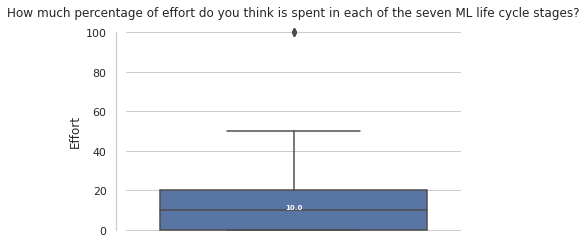

In [12]:
single_boxplot(bootstrapped_dfs['Q3_ML_Life_Cycle_Effort_Problem_Understanding'], "Effort",
               title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages?")

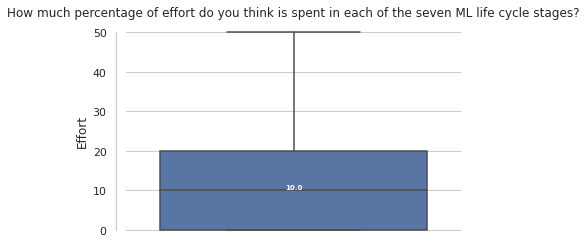

In [13]:
single_boxplot(bootstrapped_dfs['Q3_ML_Life_Cycle_Effort_Problem_Understanding'], "Effort", outliers=False,
               title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages?")

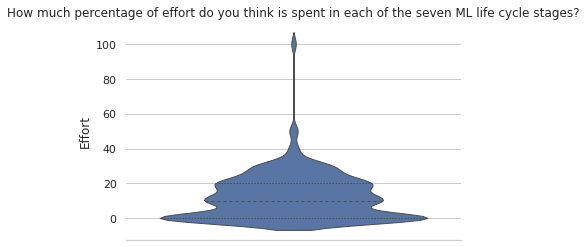

In [14]:
single_violinplot(bootstrapped_dfs['Q3_ML_Life_Cycle_Effort_Problem_Understanding'], "Effort",
                  title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages?")

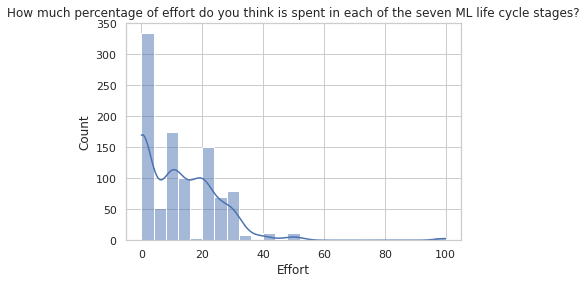

In [15]:
single_histplot(bootstrapped_dfs['Q3_ML_Life_Cycle_Effort_Problem_Understanding'], "Effort",
                title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages?")